In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
data.shape

(1470, 35)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

### DISTRIBUTION OF EMPLOYEE ATTRITION IN THE COMPANY

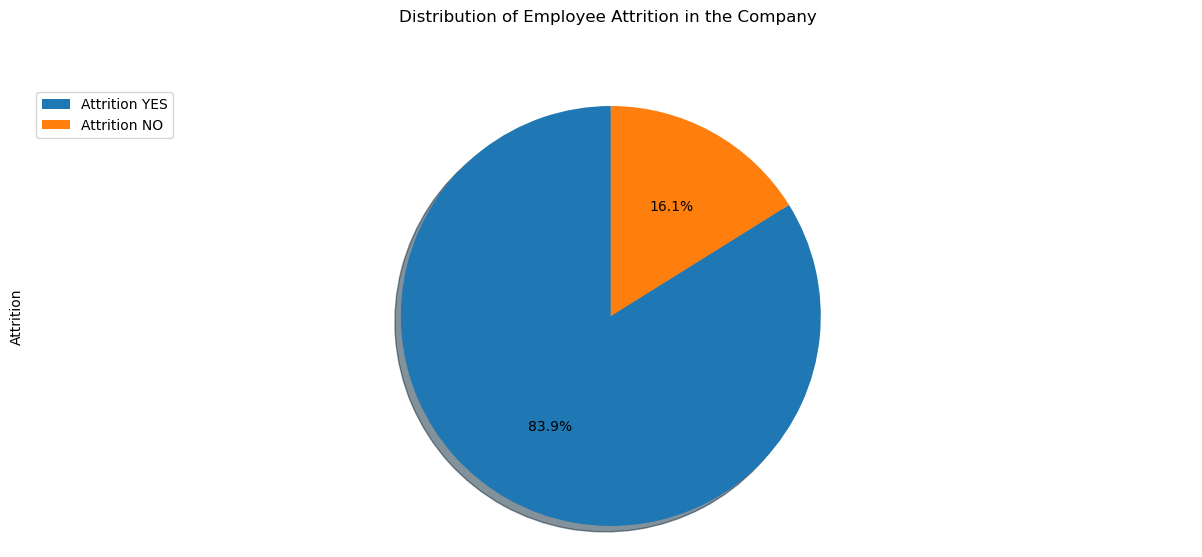

In [7]:
labels = 'Attrition YES','Attrition NO'
data['Attrition'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,                                
                            )

plt.title('Distribution of Employee Attrition in the Company ', y=1.12) 
plt.axis('equal') 
# add legend
plt.legend(labels=labels, loc='upper left') 
 # show plot
plt.show()

### From the Pie Chart, we can infer that out of 1470 employees, 16% of the employees left their job due to some reasons whereas other 84% of the employees preferred to continue their job at the company

ANALYSIS OF THE FEATURE NAMES Removing Useless Features

StandardHours

EmployeeCount

Over18

EmployeeNumber

StockOptionLevel

In [8]:
# Drop useless features - StandardHours,EmployeeCount,Over18,EmployeeNumber,StockOptionLevel
data = data.drop(columns=['StandardHours','EmployeeCount','Over18','EmployeeNumber','StockOptionLevel'])
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,11,3,1,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,23,4,4,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,15,3,2,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,11,3,3,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,12,3,4,6,3,3,2,2,2,2


### Analysis of the Rating Features

.JobSatisfaction
.EnvironmentSatisfaction
.RelationshipSatisfaction
.JobInvolvement
.WorkLifeBalance
.PerformanceRating

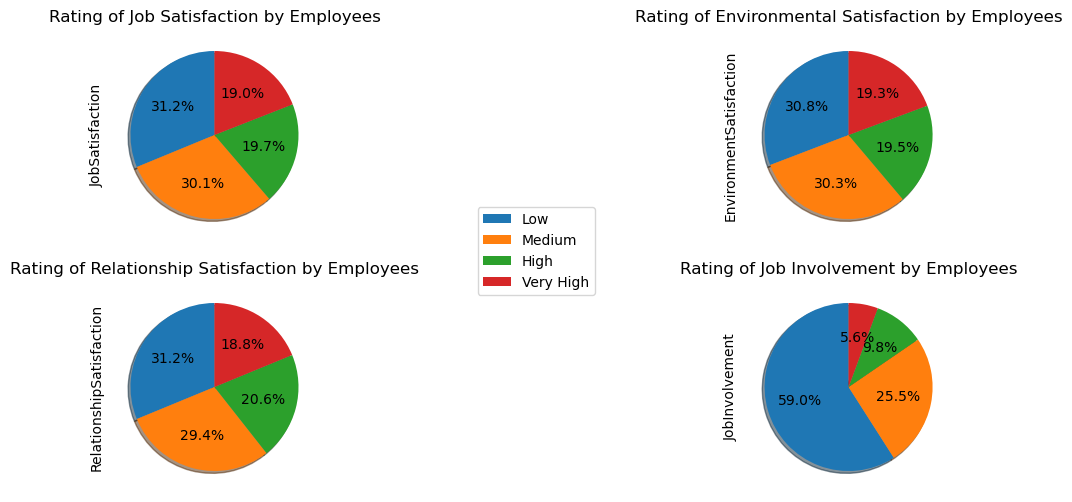

In [9]:
fig = plt.figure() 

ax1 = fig.add_subplot(221) 
ax2 = fig.add_subplot(222)  
ax3 = fig.add_subplot(223) 
ax4 = fig.add_subplot(224)  

labels = 'Low','Medium','High','Very High'

data['JobSatisfaction'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,ax=ax1) # add to subplot 2
ax1.set_title ('Rating of Job Satisfaction by Employees')
fig.legend(labels=labels,loc='center')

data['EnvironmentSatisfaction'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,ax=ax2) 
ax2.set_title('Rating of Environmental Satisfaction by Employees')

data['RelationshipSatisfaction'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,ax=ax3)
ax3.set_title('Rating of Relationship Satisfaction by Employees')

data['JobInvolvement'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,ax=ax4) 
ax4.set_title('Rating of Job Involvement by Employees')

plt.show()

### From the subplot, we can infer that more than 60% of the employees are :

- Not Satisfied in their Job
- Not Satisfied with their Work Environmnet
- Not Satisfied in their Relationship
- Not Getting involved in their job

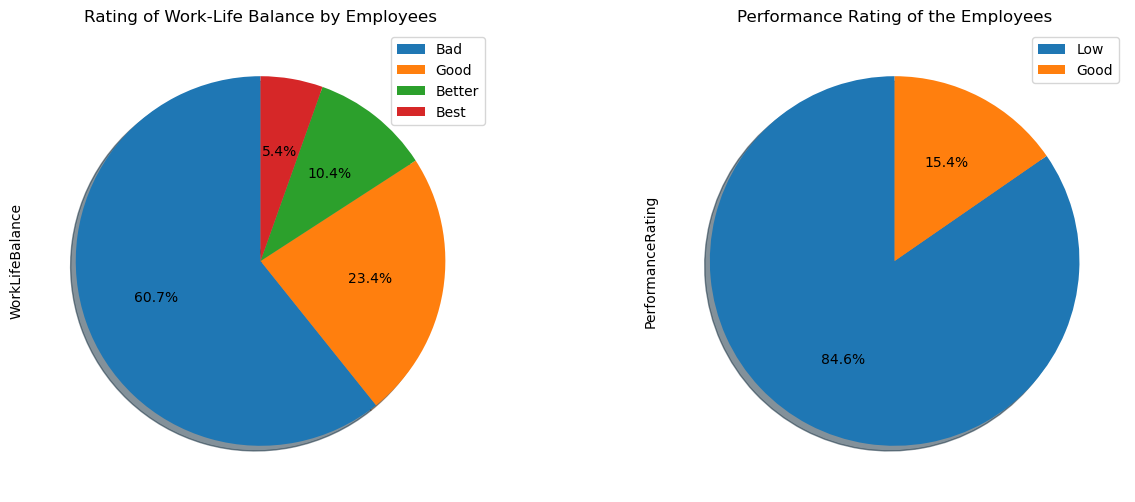

In [12]:
fig2 = plt.figure() 

ax5 = fig2.add_subplot(121) 
ax6 = fig2.add_subplot(122)  
  
labels_list1 = 'Bad','Good','Better','Best' 
labels_list2 = 'Low','Good','Excellent','Outstanding'

data['WorkLifeBalance'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,ax=ax5) # add to subplot 2
ax5.set_title ('Rating of Work-Life Balance by Employees')
ax5.legend(labels=labels_list1,loc='upper right')

data['PerformanceRating'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,ax=ax6) 
ax6.set_title('Performance Rating of the Employees')
ax6.legend(labels=labels_list2,loc='upper right')

plt.show()


### From the above piecharts, we can see that:

- Almost 60% of the employees have rated their Work-life Balance as Bad
- Almost 85% of the employees have a low performance rating

## Analysis of Business Travel Feature

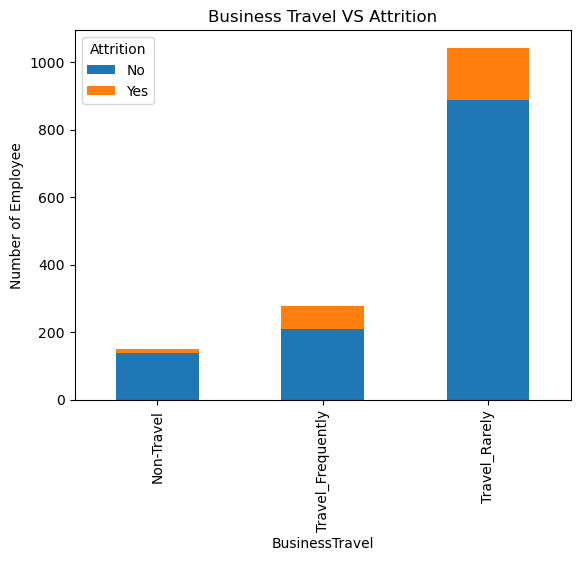

In [13]:
props = data.groupby("BusinessTravel")['Attrition'].value_counts(normalize=False).unstack()

props.plot(kind='bar', alpha=1, stacked='False')

plt.title('Business Travel VS Attrition')
plt.ylabel('Number of Employee')
plt.show()

### From the above data it is clear that Employees who travel rarely have more attrition rate followed by Employees who travel frequently

- Best way to reduce this attrition is to conduct monthly survey and to assign travel according to the Employees' business travel interest
Analysis of Work Experience
- YearsAtCompany
- YearsInCurrentRole
- YearsSinceLastPromotion
- YearsWithCurrManager
TotalWorkingYears

In [14]:
we = data[['YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'TotalWorkingYears', 'Attrition']]
we.head()

,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TotalWorkingYears,Attrition
0,6,4,0,5,8,Yes
1,10,7,1,7,10,No
2,0,0,0,0,7,Yes
3,8,7,3,0,8,No
4,2,2,2,2,6,No


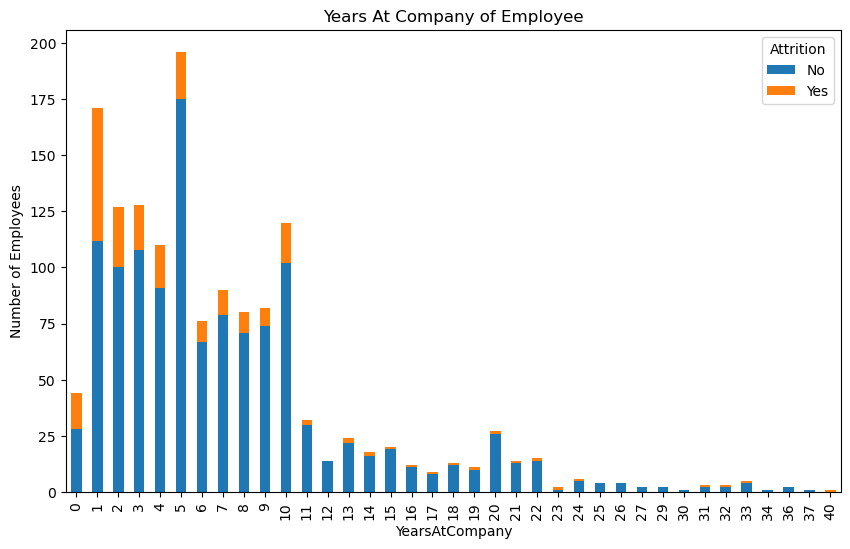

In [15]:
yac = data.groupby("YearsAtCompany")['Attrition'].value_counts(normalize=False).unstack()

yac.plot(kind='bar', stacked='False',figsize=(10,6))

plt.title('Years At Company of Employee')
plt.ylabel('Number of Employees')
plt.show()

#### It is observed that the newly arriving employees quit their jobs most,so more concern should be given to the freshers and their cause of leaving the company should be figured out

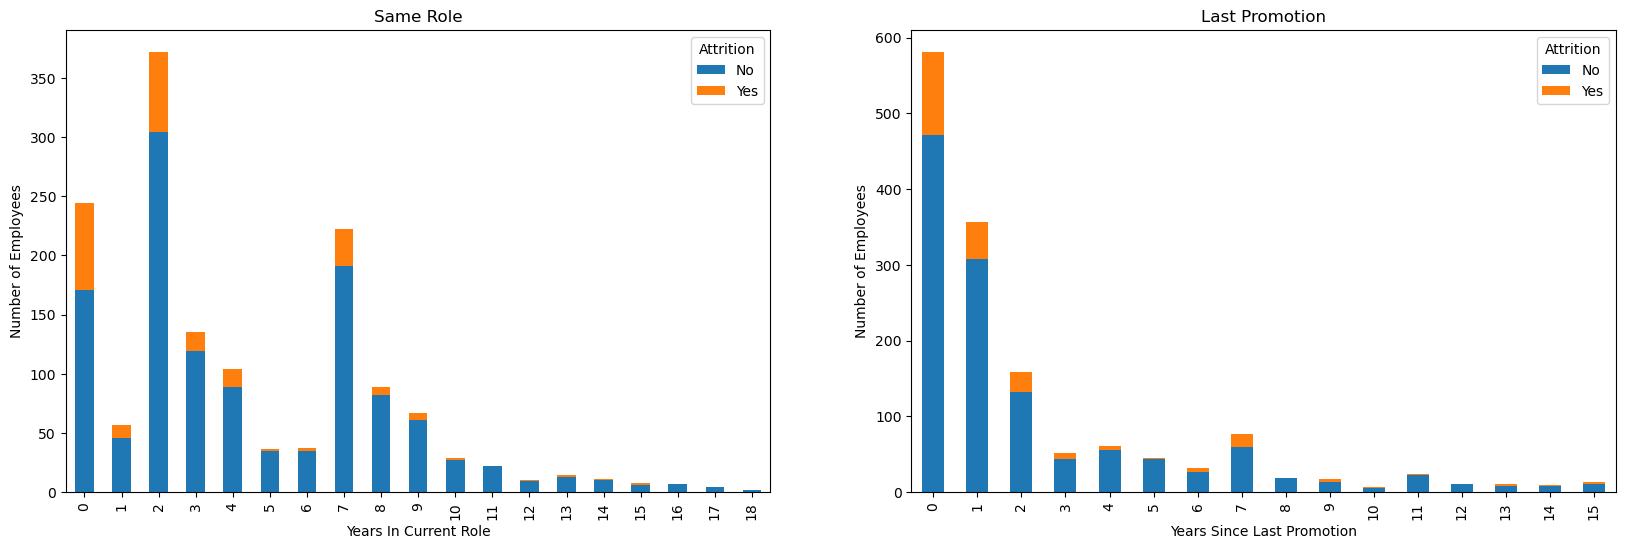

In [16]:
ycr = data.groupby("YearsInCurrentRole")['Attrition'].value_counts(normalize=False).unstack()
ysp = data.groupby("YearsSinceLastPromotion")['Attrition'].value_counts(normalize=False).unstack()


fig = plt.figure() # create figure

ax0 = fig.add_subplot(121) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(122) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
ycr.plot(kind='bar', stacked='False',figsize=(20,6), ax=ax0) # add to subplot 1
ax0.set_title('Same Role')
ax0.set_xlabel('Years In Current Role')
ax0.set_ylabel('Number of Employees')

# Subplot 2: Line plot
ysp.plot(kind='bar', stacked='False',figsize=(20,6), ax=ax1) # add to subplot 2
ax1.set_title ('Last Promotion')
ax1.set_ylabel('Number of Employees')
ax1.set_xlabel('Years Since Last Promotion')

plt.show()

### From the above two plots, it is very clear that Employees who are in same post or not getting promoted tend to leave the company most. It is a major concern, since experienced Employees quiting their jobs would affect the company most

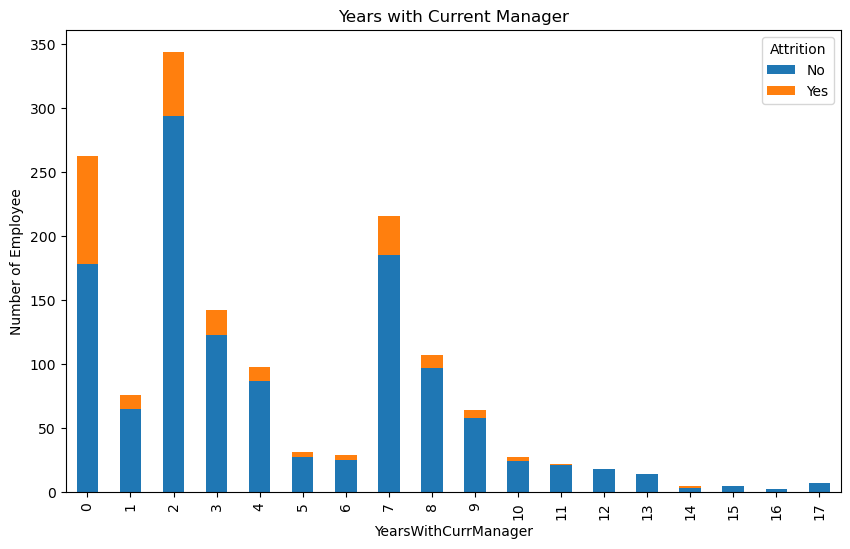

In [18]:
ycm = data.groupby("YearsWithCurrManager")['Attrition'].value_counts(normalize=False).unstack()

ycm.plot(kind='bar', stacked='False',figsize=(10,6))

plt.title('Years with Current Manager')
plt.ylabel('Number of Employee')
plt.show()

#### It is clear that in the starting of relation of Manager and Employee's are not so happy. It is important that the Manager communication with the employee from the starting itself trying to understand them soon to reduce the increase in Attrition

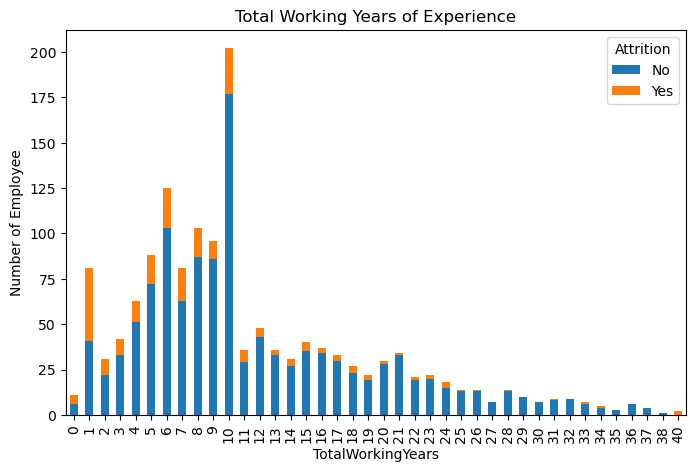

In [20]:
twy = data.groupby("TotalWorkingYears")['Attrition'].value_counts(normalize=False).unstack()

twy.plot(kind='bar', stacked='False',figsize=(8,5))

plt.title('Total Working Years of Experience')
plt.ylabel('Number of Employee')
plt.show()

### It is observed that freshers leave the company very likely so it's important that company creates a new policy to handle freshers so they don't leave the company from the start

## Analysis of Monthly Income

In [23]:
mi = data[data['Attrition']=='Yes']['MonthlyIncome']
mi = mi.reset_index()
mi.drop(['index'], axis=1, inplace=True)


mn = data[data['Attrition']=='No']['MonthlyIncome']
mn = mn.reset_index()
mn.drop(['index'], axis=1, inplace=True)

mi['mn'] = mn
mi.rename(columns={'MonthlyIncome':'Yes', 'mn':'No'}, inplace=True)
mi.head()

,Yes,No
0,5993,5130
1,2090,2909
2,2028,3468
3,3407,3068
4,2960,2670


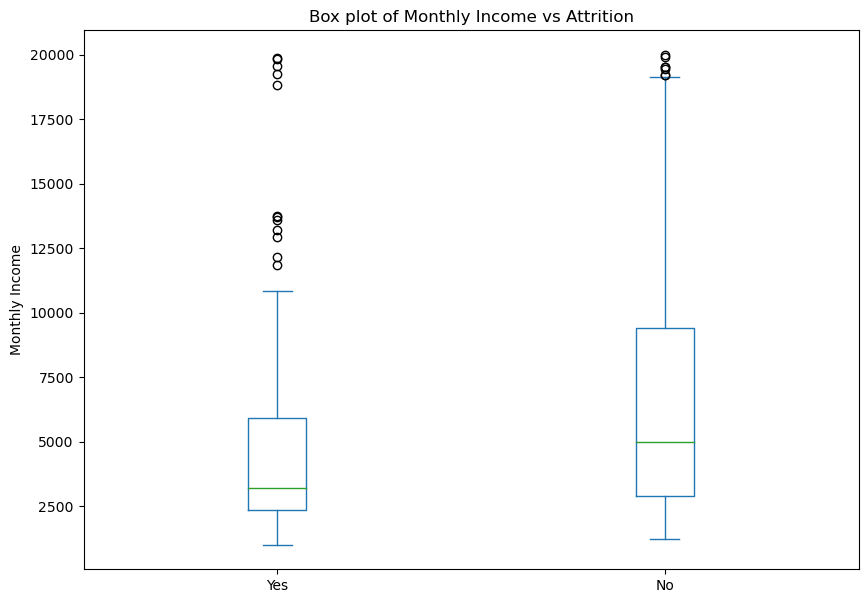

In [24]:
mi.plot(kind='box', figsize=(10, 7))

plt.title('Box plot of Monthly Income vs Attrition')
plt.ylabel('Monthly Income')

plt.show()

#### Employees who left their jobs tend to have low average monthly income than those who continued their job in the company

### Over Time Employee Analysis

<Axes: ylabel='Frequency'>

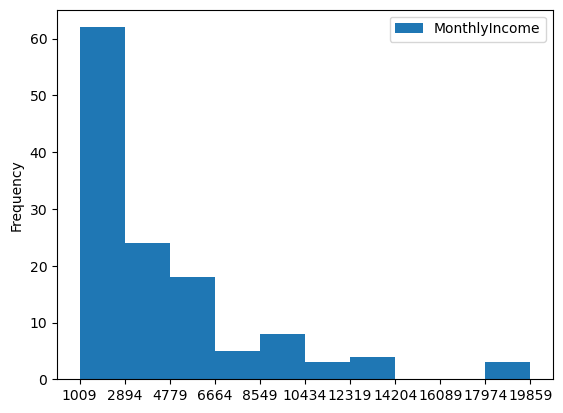

In [25]:
dot = data[['OverTime', 'MonthlyIncome', 'Attrition']]
oyay = dot[(data['OverTime']=='Yes') & (data['Attrition']=='Yes')]
oyay = oyay.sort_values(by = 'MonthlyIncome', ascending=False, axis=0) #sorting to get the top values
count, bin_edges = np.histogram(oyay['MonthlyIncome'])

oyay.plot(kind='hist', xticks=bin_edges)

<Axes: ylabel='Frequency'>

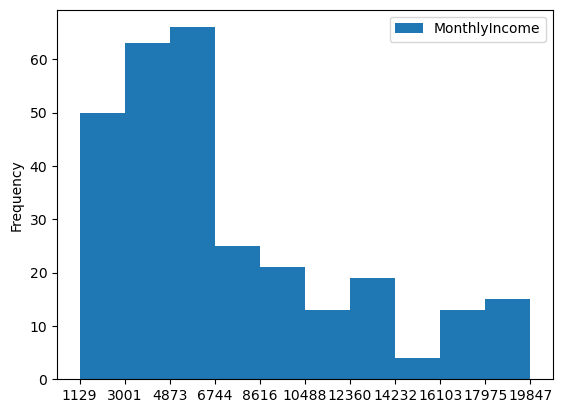

In [26]:
oyan = dot[(data['OverTime']=='Yes') & (data['Attrition']=='No')]
count, bin_edges = np.histogram(oyan['MonthlyIncome'])

oyan.plot(kind='hist', xticks=bin_edges)

<Axes: ylabel='Frequency'>

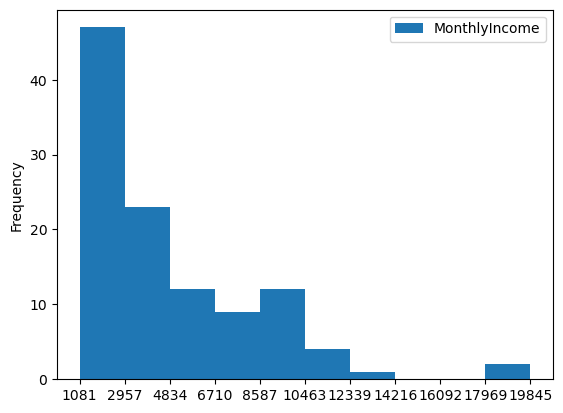

In [27]:
onay = dot[(data['OverTime']=='No') & (data['Attrition']=='Yes')]
count, bin_edges = np.histogram(onay['MonthlyIncome'])

onay.plot(kind='hist', xticks=bin_edges)

<Axes: ylabel='Frequency'>

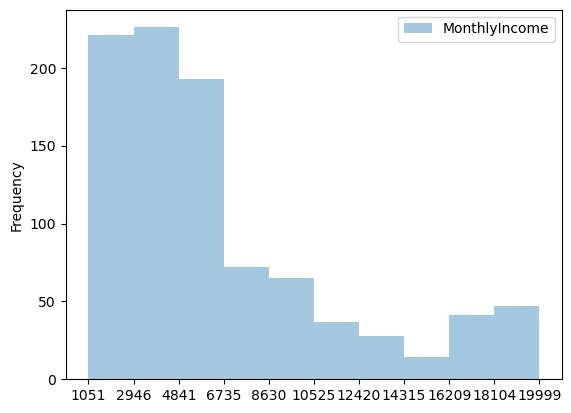

In [28]:
onan = dot[(data['OverTime']=='No') & (data['Attrition']=='No')]
count, bin_edges = np.histogram(onan['MonthlyIncome'])

onan.plot(kind='hist',alpha =0.4, xticks=bin_edges)

## Analysis on Department

In [29]:
dpt = data[['Department','Attrition']]
dpt.head()

,Department,Attrition
0,Sales,Yes
1,Research & Development,No
2,Research & Development,Yes
3,Research & Development,No
4,Research & Development,No


In [30]:
dpt['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

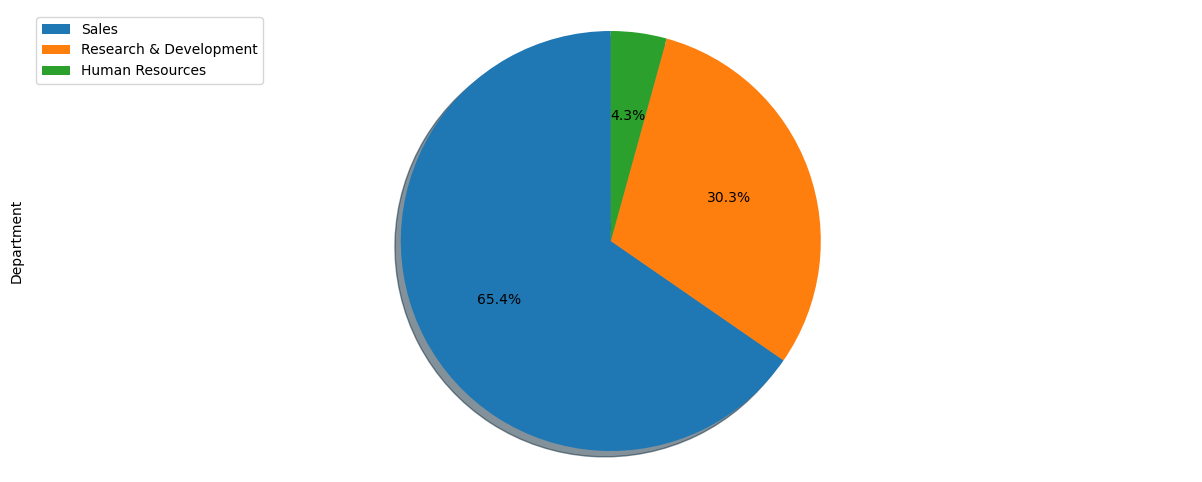

In [31]:
dpt['Department'].value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None)   
plt.axis('equal') 
plt.legend(labels=dpt['Department'].unique(), loc='upper left')

In [32]:
dpm = data.groupby("Department")['Attrition'].value_counts(normalize=False).unstack()
dpm = dpm.transpose()
dpm

Department,Human Resources,Research & Development,Sales
Attrition,,,
No,51,828,354
Yes,12,133,92


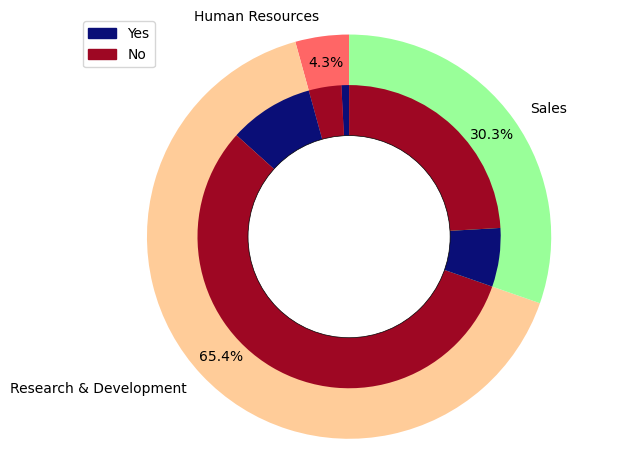

In [33]:
labels = ['Human Resources', 'Research & Development', 'Sales',]
sizes = [63, 961, 446]
labels_attrition = ['Yes','No','Yes','No','Yes','No']
sizes_attrition = [12,51,133,828,92,354]
colors = ['#ff6666', '#ffcc99', '#99ff99']

colors_attrition = ['#0a0e77','#9e0723', '#0a0e77','#9e0723', '#0a0e77','#9e0723', '#0a0e77','#9e0723']
 
# Plot
plt.pie(sizes, autopct='%1.1f%%', pctdistance=.87, labels=labels, colors=colors, startangle=90,frame=True)
plt.pie(sizes_attrition,colors=colors_attrition,radius=0.75,startangle=90)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0.5)
fig6 = plt.gcf()
fig6.gca().add_artist(centre_circle)

#legend
import matplotlib.patches as mpatches
pur = mpatches.Patch(color='#0a0e77', label='Yes')
pin = mpatches.Patch(color='#9e0723', label='No')
plt.legend(handles=[pur, pin], loc='upper left')

plt.axis('equal')
plt.tight_layout()
plt.show()

## Analysis Gender

In [34]:
gda = data[['Gender', 'DistanceFromHome', 'Attrition']]
gda.head()

,Gender,DistanceFromHome,Attrition
0,Female,1,Yes
1,Male,8,No
2,Male,2,Yes
3,Female,3,No
4,Male,2,No


In [35]:
gda['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

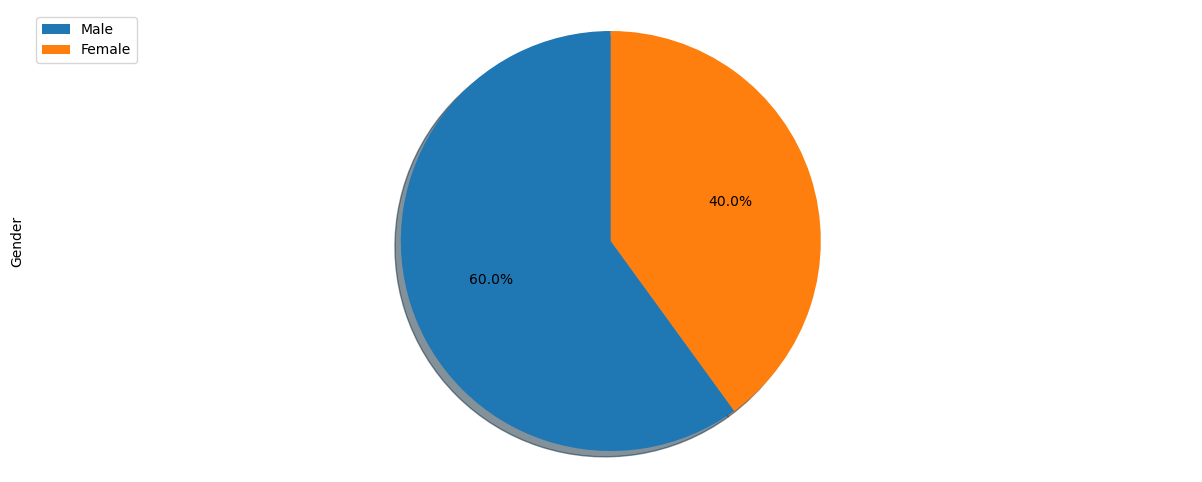

In [36]:
gda['Gender'].value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None)   
plt.axis('equal') 
plt.legend(labels=['Male', 'Female'], loc='upper left')

In [37]:
fma = gda.groupby("Gender")['Attrition'].value_counts(normalize=False).unstack()
fma = fma.transpose()
fma

Gender,Female,Male
Attrition,,
No,501,732
Yes,87,150


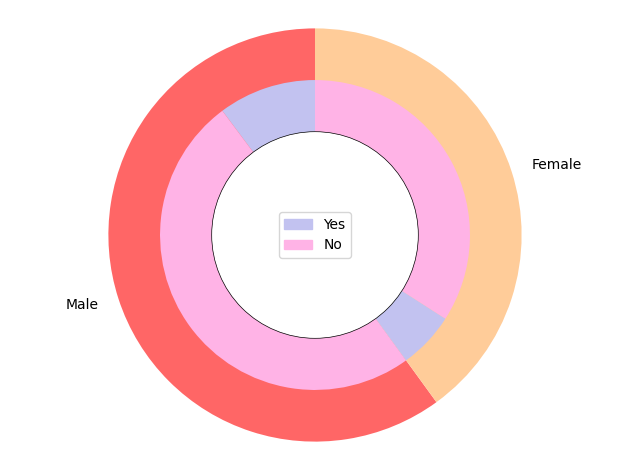

In [38]:
labels = ['Male', 'Female']
sizes = [882,588]
labels_attrition = ['Yes','No','Yes','No']
sizes_attrition = [150,732,87,501]
colors = ['#ff6666', '#ffcc99']

colors_attrition = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
 
# Plot
plt.pie(sizes, labels=labels, colors=colors, startangle=90,frame=True)
plt.pie(sizes_attrition,colors=colors_attrition,radius=0.75,startangle=90)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0.5)
fig6 = plt.gcf()
fig6.gca().add_artist(centre_circle)

#legend
import matplotlib.patches as mpatches
pur = mpatches.Patch(color='#c2c2f0', label='Yes')
pin = mpatches.Patch(color='#ffb3e6', label='No')
plt.legend(handles=[pur, pin], loc='center')

plt.axis('equal')
plt.tight_layout()
plt.show()

### Analysis of Marital Status

In [39]:
ms = data[['MaritalStatus', 'Attrition']]
ms.head()

,MaritalStatus,Attrition
0,Single,Yes
1,Married,No
2,Single,Yes
3,Married,No
4,Married,No


In [40]:
ms['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

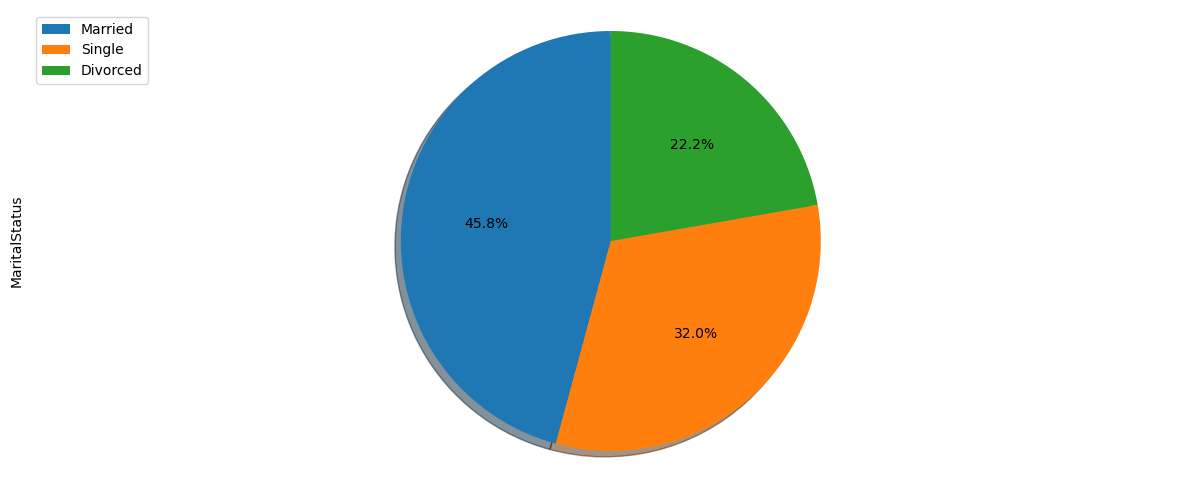

In [41]:
ms['MaritalStatus'].value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None)   
plt.axis('equal') 
plt.legend(labels=['Married', 'Single', 'Divorced'], loc='upper left')

In [42]:
msa = ms.groupby("MaritalStatus")['Attrition'].value_counts(normalize=False).unstack()
msa = msa.transpose()
msa

MaritalStatus,Divorced,Married,Single
Attrition,,,
No,294,589,350
Yes,33,84,120


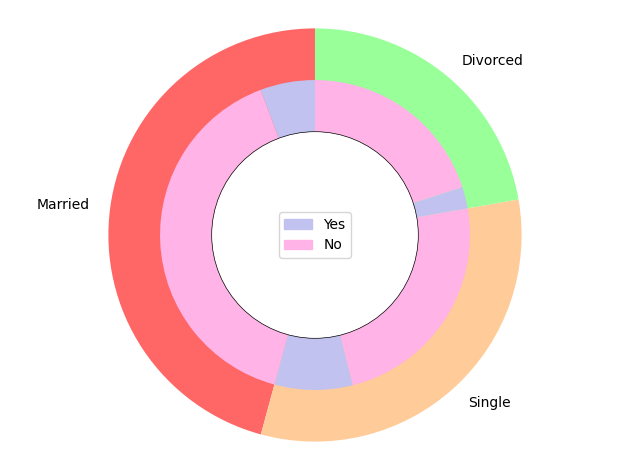

In [43]:
labels = ['Married', 'Single', 'Divorced']
sizes = [673, 470, 327]
labels_attrition = ['Yes','No','Yes','No','Yes','No']
sizes_attrition = [84,589,120,350,33,294]
colors = ['#ff6666', '#ffcc99', '#99ff99']

colors_attrition = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
 
# Plot
plt.pie(sizes, labels=labels, colors=colors, startangle=90,frame=True)
plt.pie(sizes_attrition,colors=colors_attrition,radius=0.75,startangle=90)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0.5)
fig6 = plt.gcf()
fig6.gca().add_artist(centre_circle)

#legend
import matplotlib.patches as mpatches
pur = mpatches.Patch(color='#c2c2f0', label='Yes')
pin = mpatches.Patch(color='#ffb3e6', label='No')
plt.legend(handles=[pur, pin], loc='center')

plt.axis('equal')
plt.tight_layout()
plt.show()

In [44]:
from sklearn import preprocessing
import math
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [45]:
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
data = data.drop(columns=['StandardHours','EmployeeCount','Over18','EmployeeNumber','StockOptionLevel'])

le = preprocessing.LabelEncoder()
categorial_variables = ['Attrition','BusinessTravel','Department','EducationField',
                        'Gender','JobRole','MaritalStatus','OverTime']
for i in categorial_variables:
    data[i] = le.fit_transform(data[i])
data.head(5)
data.to_csv('LabelEncoded_CleanData.csv')

In [46]:
target = data['Attrition']
train = data.drop('Attrition',axis = 1)
train.shape

(1470, 29)

### Implementation of all the popular classifiers in scikit-learn
Logistic Regression

SVM

KNN

Decision Tree

K Means Clustering

In [48]:
train_accuracy = []
test_accuracy = []
models = ['Logistic Regression','SVM','KNN','Decision Tree','K Means Clustering']

In [49]:
#Defining a function which will give us train and test accuracy for each classifier.
def train_test_error(y_train,y_test):
    train_error = ((y_train==Y_train).sum())/len(y_train)*100
    test_error = ((y_test==Y_test).sum())/len(Y_test)*100
    train_accuracy.append(train_error)
    test_accuracy.append(test_error)
    print('{}'.format(train_error) + " is the train accuracy")
    print('{}'.format(test_error) + " is the test accuracy")
X_train, X_test, Y_train, Y_test = train_test_split(train, target, test_size=0.33, random_state=42)

## Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,Y_train)
train_predict = log_reg.predict(X_train)
test_predict = log_reg.predict(X_test)
y_prob = log_reg.predict(train)
y_pred = np.where(y_prob > 0.5, 1, 0)
train_test_error(train_predict , test_predict)

83.63821138211382 is the train accuracy
85.59670781893004 is the test accuracy


C:\Users\Sumit Garg\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## SVM

In [51]:
from sklearn import svm
SVM = svm.SVC(probability=True)
SVM.fit(X_train,Y_train)
train_predict = SVM.predict(X_train)
test_predict = SVM.predict(X_test)
train_test_error(train_predict , test_predict)

83.02845528455285 is the train accuracy
85.59670781893004 is the test accuracy


## KNN

In [52]:
from sklearn import neighbors
n_neighbors = 15
knn = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knn.fit(X_train,Y_train)
train_predict = knn.predict(X_train)
test_predict = knn.predict(X_test)
train_test_error(train_predict , test_predict)

100.0 is the train accuracy
84.5679012345679 is the test accuracy


## Decision Tree

In [53]:
from sklearn import tree
dec = tree.DecisionTreeClassifier()
dec.fit(X_train,Y_train)
train_predict = dec.predict(X_train)
test_predict = dec.predict(X_test)
train_test_error(train_predict , test_predict)

100.0 is the train accuracy
79.42386831275721 is the test accuracy


## K-MEANS CLUSTERING

In [55]:
from sklearn.cluster import KMeans

kms = KMeans(n_clusters=2, random_state=1)
kms.fit(X_train,Y_train)
train_predict = kms.predict(X_train)
test_predict = kms.predict(X_test)
train_test_error(train_predict,test_predict)

C:\Users\Sumit Garg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Sumit Garg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


50.0 is the train accuracy
50.82304526748971 is the test accuracy


In [56]:
results = pd.DataFrame({"Test Accuracy" : test_accuracy , "Train Accuracy" : train_accuracy} , index = models)


In [57]:
results


,Test Accuracy,Train Accuracy
Logistic Regression,85.596708,83.638211
SVM,85.596708,83.028455
KNN,84.567901,100.000000
Decision Tree,79.423868,100.000000
K Means Clustering,50.823045,50.000000


Since Logistic Regression has the highest test accuracy, Logistic regression is the winner